 <b> Loan Eligibility prediction <b>
 
 <b> Table Contents</b>
 
 <b>  1.  Getting started importing required libraries and Loading the Data </b>
 
 <b>  2.  Diving into  the data </b>
 
 <b>  3.  Exploratory Data Analysis (EDA)</b>
 
 <b>( i). Univariate Analysis </b>
 
 <b> (ii). Univariate Analysis </b>
 
 <b> 4 Dealing with missing values and outliers </b>
 
 <b>5. Evaluation metrics for classification problems </b>
 
 <b>6 Model Building Part 1 </b>
 
 <b>7 Logistic Regression using stratified k-folds cross validation 1 </b>
    
 <b>8 Feature Engineering </b>
    
 <b>9 Model Building Part 2 </b>
    
 <b>i Logistic Regression  </b>
 <b>ii Decision Tree  </b>
 <b>iii Random Forest</b>
 
 
 
 
 
 
 
 
 
 
 

 <b> 1. Getting started importing required libraries and Loading the Data <b>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
# reading Data and viewing the first five rows
train = pd.read_csv('datasets/train.csv')
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


<b>2. Diving into  the data </b>

In [6]:
test = pd.read_csv('datasets/test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [7]:
#keeping the original data sets in case of any changes 
train_original=train.copy()
test_original=test.copy()

In [8]:
# diving into our data set checking which features or columns we have
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
 #checking the data types of our features
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
train.shape

(614, 13)

In [12]:
test.shape

(367, 12)

In [13]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [14]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

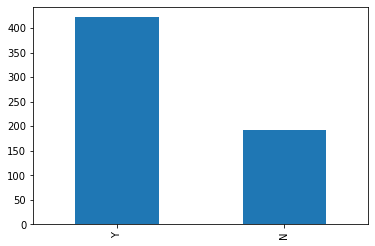

In [15]:
# Checking the results
train['Loan_Status'].value_counts().plot.bar()

<b> Independent Variable  (Categorical)  </b>

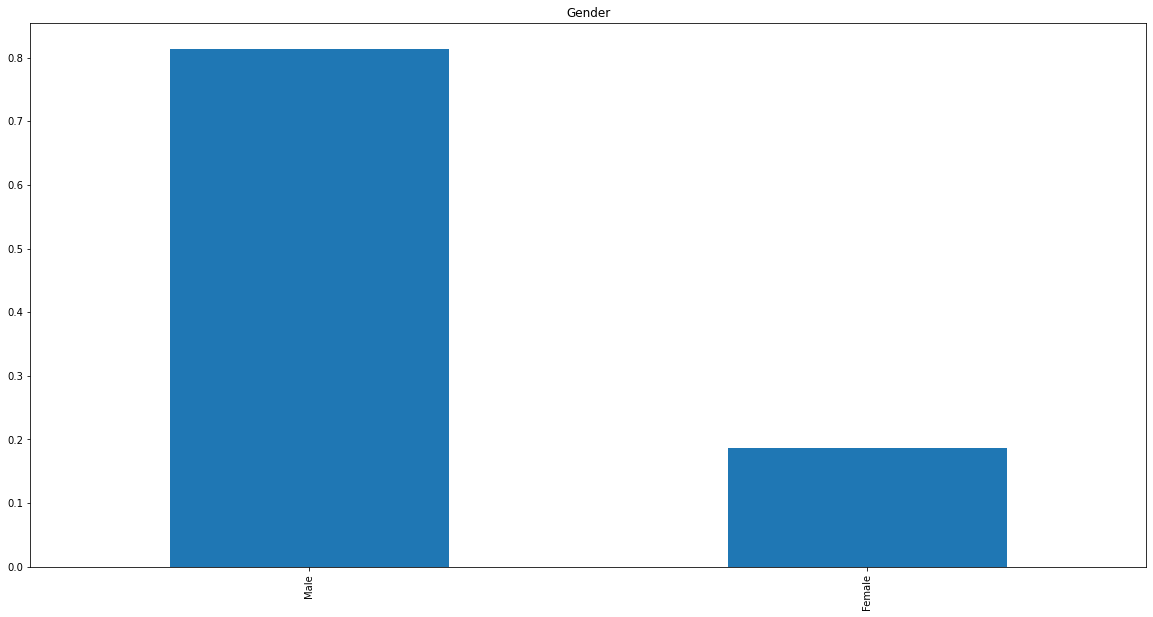

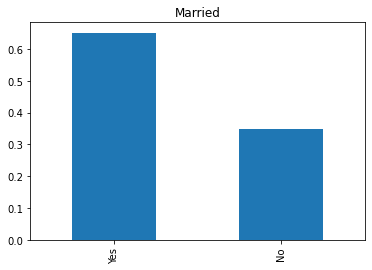

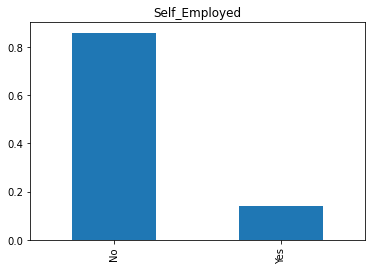

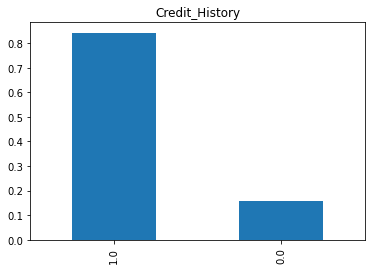

In [16]:
# to get descriptive statistics -Independent Variable (Categorical)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Gender')
plt.show()
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

<b> Independent Variable (Ordinal) </b>

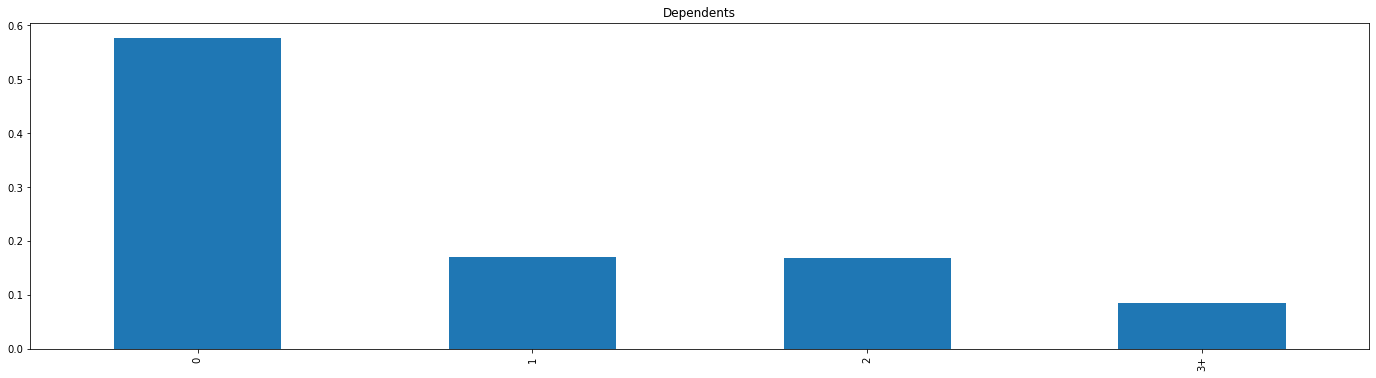

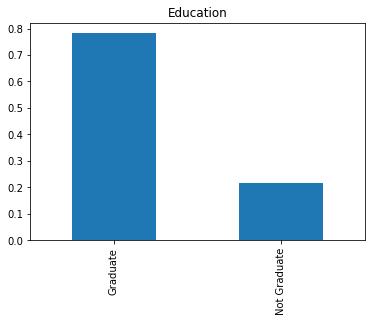

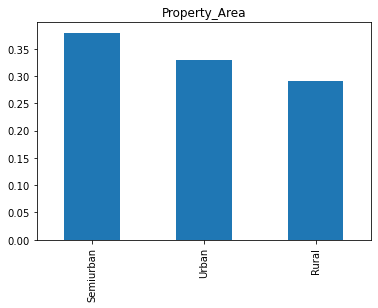

In [17]:
#Independent Variable (Ordinal)

train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.show()
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

<b>Independent Variable (Numerical) </b>

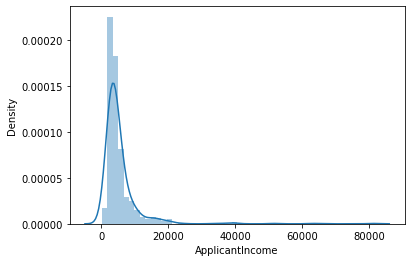

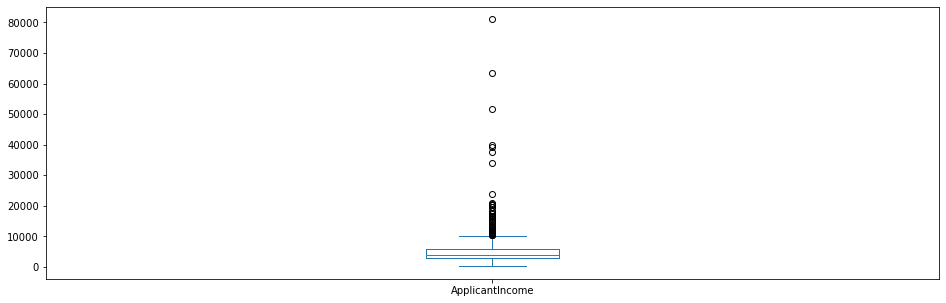

In [18]:
# using sea born to plot 
# Independent Variable (Numerical)

sns.distplot(train['ApplicantIncome'])
plt.show()
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

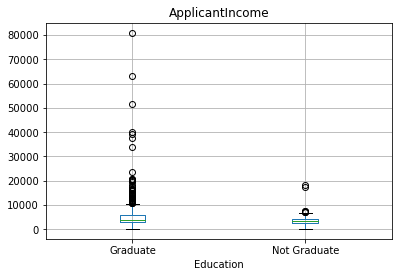

In [19]:
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")

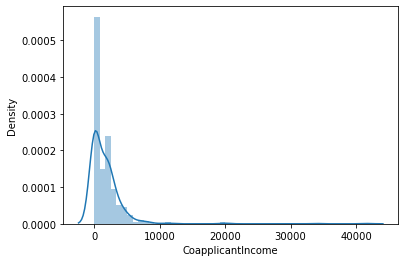

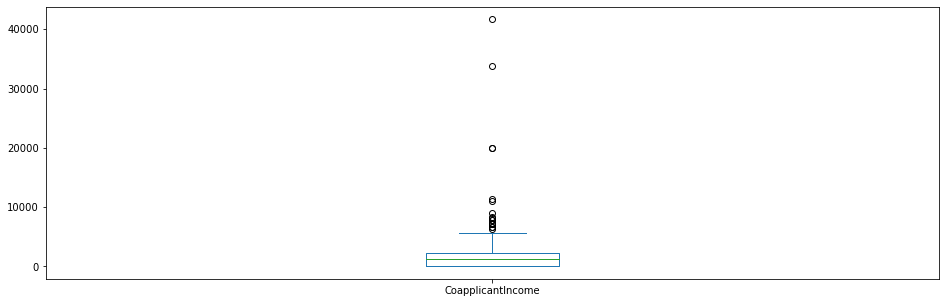

In [20]:
sns.distplot(train['CoapplicantIncome'])
plt.show()
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

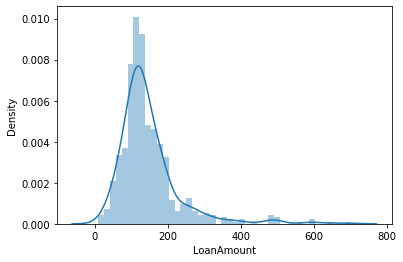

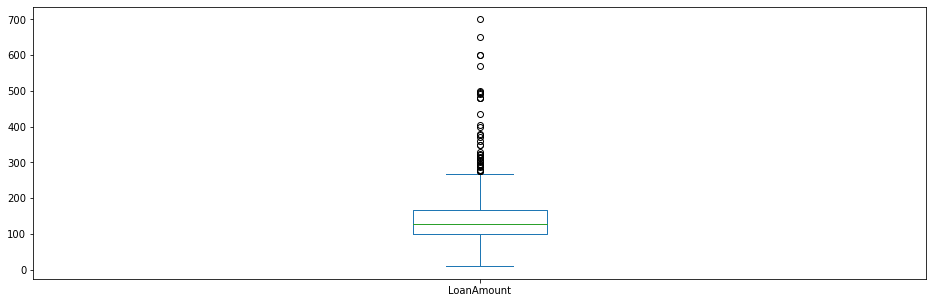

In [21]:
train.notna()
# train.dropna()
# print(train[train['LoanAmount'].isnull()])
# train['LoanAmount'] = pd.to_numeric(train['LoanAmount'], errors='coerce')
# train = train.dropna(subset=['LoanAmount'])
# train['LoanAmount'] = train['LoanAmount'].astype(int)
sns.distplot(train['LoanAmount'])
plt.show()
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

<b> Bivariate Analysis </b>

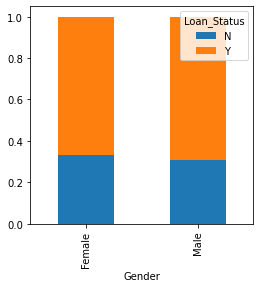

In [22]:
# Categorical Independent Variable vs Target Variable

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

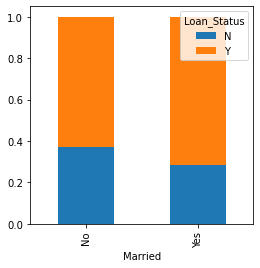

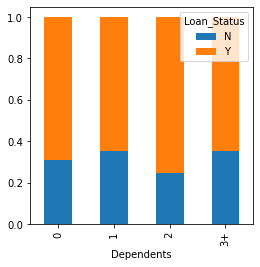

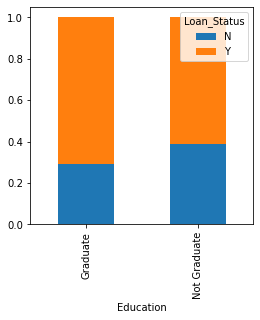

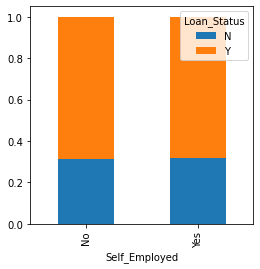

In [23]:
#let us visualize the remaining categorical variables vs target variable 
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

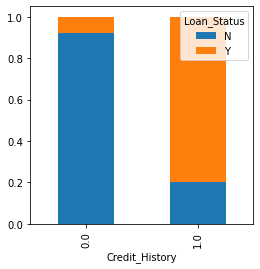

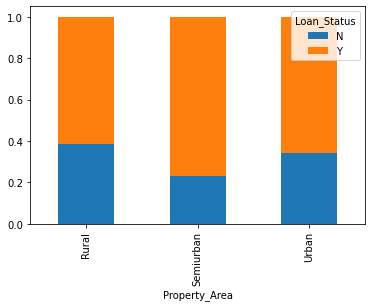

In [24]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

 <b> Numerical Independent Variable vs Target Variable </b>

<AxesSubplot:xlabel='Loan_Status'>

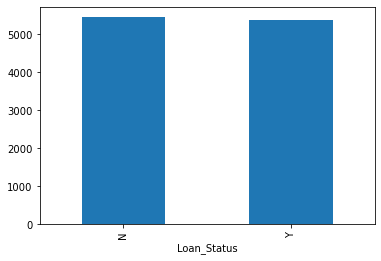

In [25]:
#Numerical Independent Variable vs Target Variable
# finding the mean income of people whose loan has been approved vs non
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

<b> Let's visualize the Loan Amount variable </b>

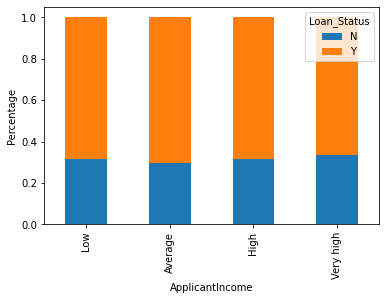

In [26]:

# using bins to get a better view to get the status for each bin
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

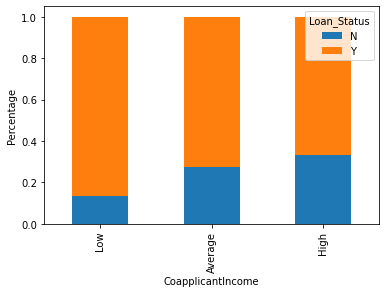

In [27]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

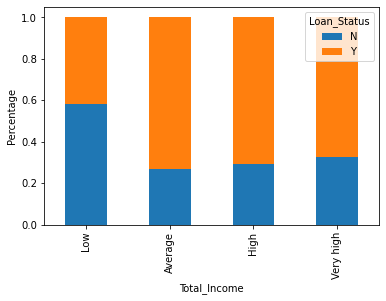

In [28]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('Total_Income')
P=plt.ylabel('Percentage')

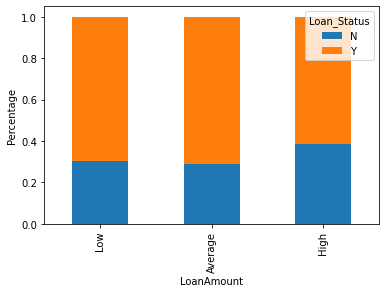

In [29]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

<AxesSubplot:>

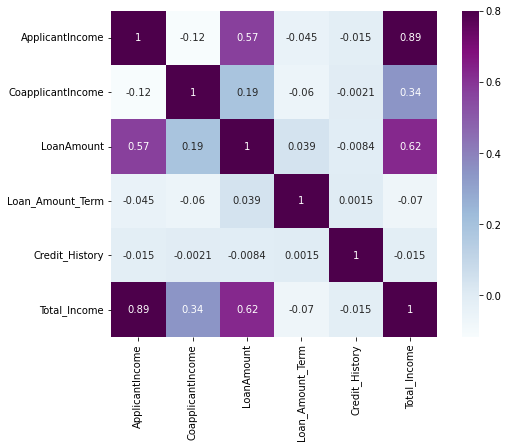

In [30]:
# looking at the  correlation between all the numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [31]:
# print(train.dtypes)
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

<b> Missing value imputation </b>

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [33]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [34]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [36]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [37]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [38]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Married'].fillna(train['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

<b> Outlier Treatment </b>

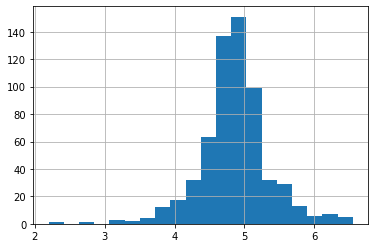

In [39]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log']=np.log(test['LoanAmount'])

<b> Model Building  Part I </b>

In [40]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [41]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [42]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [45]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.772972972972973

In [46]:
pred_test = model.predict(test)

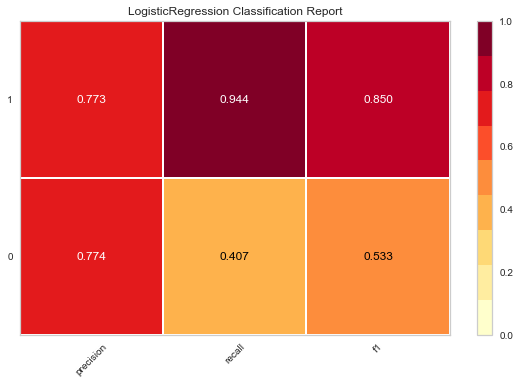

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [47]:
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
visualizer = ClassificationReport(model)

visualizer.fit(x_train, y_train)
visualizer.score(x_cv,y_cv )
visualizer.show()

In [48]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [49]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[ 1.63968325e-06 -5.41085733e-05 -1.54147835e-03 -2.20835768e-03
   2.97407520e+00 -2.01768631e-01 -1.94324209e-01  2.19425032e-01
  -1.95805738e-01  2.20906562e-01 -6.32448808e-03  1.49007312e-01
  -5.09906864e-01  3.92324864e-01  4.51899232e-01 -4.26798408e-01
  -2.76058532e-01  3.01159355e-01 -3.78660846e-01  5.22739720e-01
  -1.18978050e-01]]
[0.03083086]


In [50]:
submission = pd.read_csv('datasets/project/sample_submission.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [51]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [52]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [53]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('datasets/project/Logistic_Regression.csv')

In [54]:
from sklearn.model_selection import StratifiedKFold

In [55]:
i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=(None))
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=(None))
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 10 
accuracy_score 0.8064516129032258

2 of kfold 10 
accuracy_score 0.8225806451612904

3 of kfold 10 
accuracy_score 0.7419354838709677

4 of kfold 10 
accuracy_score 0.7419354838709677

5 of kfold 10 
accuracy_score 0.7868852459016393

6 of kfold 10 
accuracy_score 0.7868852459016393

7 of kfold 10 
accuracy_score 0.8524590163934426

8 of kfold 10 
accuracy_score 0.819672131147541

9 of kfold 10 
accuracy_score 0.7868852459016393

10 of kfold 10 
accuracy_score 0.8032786885245902

 Mean Validation Accuracy 0.7948968799576944


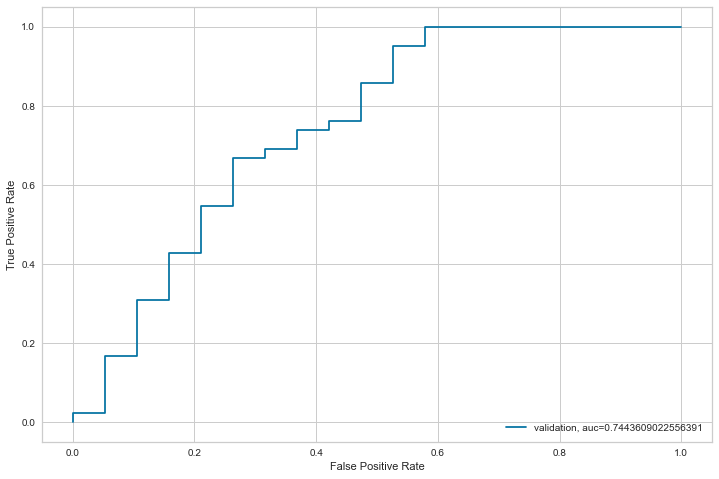

In [56]:
# visualizing the roc curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [57]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [58]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [59]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

<b> Feature Engineering </b>

In [60]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

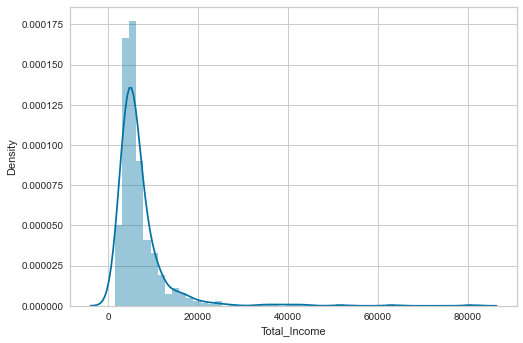

In [61]:
sns.distplot(train['Total_Income'])

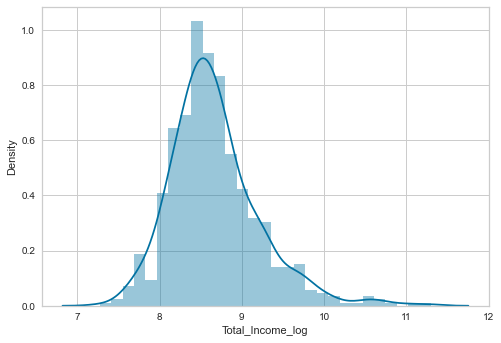

In [62]:
# applying the log transformation to normalize our data 

train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

In [63]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

<AxesSubplot:xlabel='EMI', ylabel='Density'>

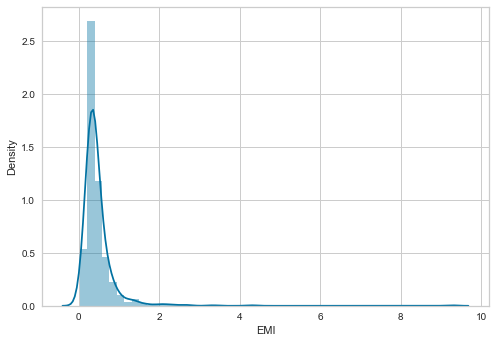

In [64]:
sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

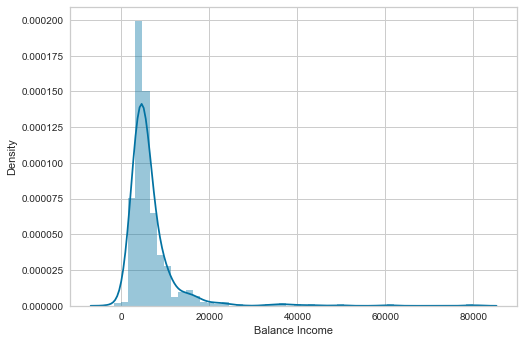

In [65]:
train['Balance Income'] = train['Total_Income']-(train['EMI']*1000)
test['Balance Income'] = test['Total_Income']-(test['EMI']*1000)
sns.distplot(train['Balance Income'])

In [66]:
#dropping variables used to create new variables

# print (train.dtypes)
# print (test.dtypes)
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

<b> Model Building II  </b>

X = train.drop('Loan_Status',1)
y = train.Loan_Status

<b> Performing stratified Logistic regression  </b>

In [ ]:
# performing stratified Logistic regression
i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))

In [69]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [70]:
submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [71]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('datasets/project/Decision_tree.csv')

<b> Decision Tree  </b>

In [6]:
#Let’s fit the decision tree model with 5 folds of cross validation.
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=10,random_state=None,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N', inplace=True)
submission['Loan_Status'].replace(1, 'Y', inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('datasets/project//Decision Tree.csv')

NameError: name 'StratifiedKFold' is not defined

In [73]:
# performing random test

from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8292682926829268

2 of kfold 5 
accuracy_score 0.8130081300813008

3 of kfold 5 
accuracy_score 0.7723577235772358

4 of kfold 5 
accuracy_score 0.8048780487804879

5 of kfold 5 
accuracy_score 0.7540983606557377

 Mean Validation Accuracy 0.7947221111555378


In [74]:

from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
# from sklearn.model_selection import train_test_split
#  x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
# grid_search.fit(x_train,y_train)

# GridSearchCV(cv=None, error_score='raise',
#              estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
#                                               max_depth=None, max_features='auto', max_leaf_nodes=None, 
#                                               min_impurity_decrease=0.0, min_impurity_split=None, 
#                                               min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0,                                                n_estimators=10, n_jobs=1, oob_score=False, random_state=1, 
#                                                verbose=0, warm_start=False),
#              fit_params=None, iid=True, n_jobs=1, 
#              param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],'n_estimators':[1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
#              pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',scoring=None, verbose=0)

#  grid_search.best_estimator_
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', 
#                        max_depth=3, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, 
#                         min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, 
#                         min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=1, oob_score=False, 
#                         random_state=1, verbose=0, warm_start=False)
#  i=1
#  mean = 0
#  kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
#  for train_index,test_index in kf.split(X,y):
# print ('\n{} of kfold {} '.format(i,kf.n_splits))
# xtr,xvl = X.loc[train_index],X.loc[test_index]
#  ytr,yvl = y[train_index],y[test_index]
#  model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
# model.fit(xtr,ytr)
#  pred_test = model.predict(xvl)
#  score = accuracy_score(yvl,pred_test)
# mean += score
#      print ('accuracy_score',score)
# i+=1
# pred_test = model.predict(test)
# pred = model.predict_proba(xvl)[:,1]
# print (' Mean Validation Accuracy',mean/(i-1))
print('grid_search')

grid_search


<b> Random Forest  </b>

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [76]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [77]:
#Random forest model which the most accurate model
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.8130081300813008

2 of kfold 5 
accuracy_score 0.8455284552845529

3 of kfold 5 
accuracy_score 0.8048780487804879

4 of kfold 5 
accuracy_score 0.7967479674796748

5 of kfold 5 
accuracy_score 0.7786885245901639

 Mean Validation Accuracy 0.8077702252432362


In [78]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [79]:
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('datasets/project/RandomForest.csv')

<AxesSubplot:>

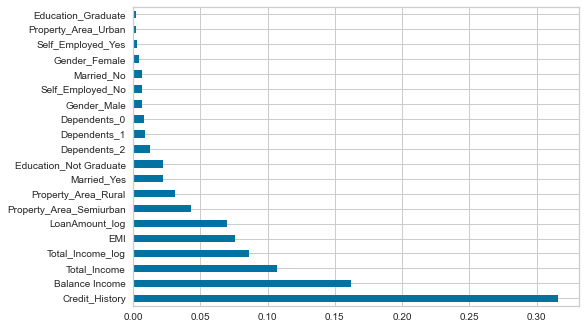

In [80]:
#showing feature importances of random forest 
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(20).plot(kind='barh')